# Clustering

This code forms clusters (similar assemblages), inspects their similarity using exploratory data analysis, and then uses a decision tree to understand the rules (based on the hydrological features) that separate these clusters. 

***

Start by reading in the wrangled data

In [191]:
import pandas as pd

df = pd.read_csv("data/pool4_wrangled.csv")
df

,temp,depth,current,do,year,loc_id,BHMW,BKBH,BKCP,BKSS,...,TPMT,U-CT,U-CY,WDSN,WLYE,WTBS,WTCP,WTSK,YLBH,YWPH
0,10.7,0.86,0.00,10.2,2006,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
1,10.5,2.80,0.01,10.1,2006,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,11.7,2.00,0.02,8.3,2006,2,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
3,12.5,0.61,0.16,8.2,2007,3,1,0,0,1,...,1,0,0,0,0,0,0,1,0,1
4,14.3,1.00,0.06,6.4,2007,4,0,0,1,1,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,15.4,1.20,0.00,6.5,2005,109,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
112,15.7,1.40,0.02,6.7,2005,110,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
113,8.5,0.66,0.00,9.2,2006,111,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
114,7.9,0.50,0.01,10.7,2008,112,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


We have to standardize (mean 0 standard deviation 1) all of the clustering features (temp, depth, current, do) so that they are on comparable scales. 

In [192]:
from sklearn.preprocessing import StandardScaler

df_std = df.copy()

scaler = StandardScaler()
df_std[['temp', 'depth', 'current', 'do']] = scaler.fit_transform(df_std[['temp', 'depth', 'current', 'do']])

### Hierarchical Clustering

Options to choose from: 

1. agglmoerative vs divisive clustering
2. distance metric (jaccard's vs cosine)
3. the linkeage (single vs complete vs average) 
4. the number of clusters we want

Techincally, there are other clusteirng methods that are non-euclidean based (K-Medoids) that we could consider. 
****

First, we'll identify the fish columns, those are the binary (1/0) presence/absence data. We use those to form our clusters. 

In [193]:
fish_cols =  [x for x in df.columns.tolist() if x.isupper()]

Identify the distance between each assemblage

In [194]:
from scipy.spatial.distance import pdist

cosine_distances = pdist(df[fish_cols], metric='cosine')

Perform the clustering

In [195]:
from scipy.cluster.hierarchy import linkage 
Z = linkage(cosine_distances, method='complete') 

Plot the resulting dendrogram

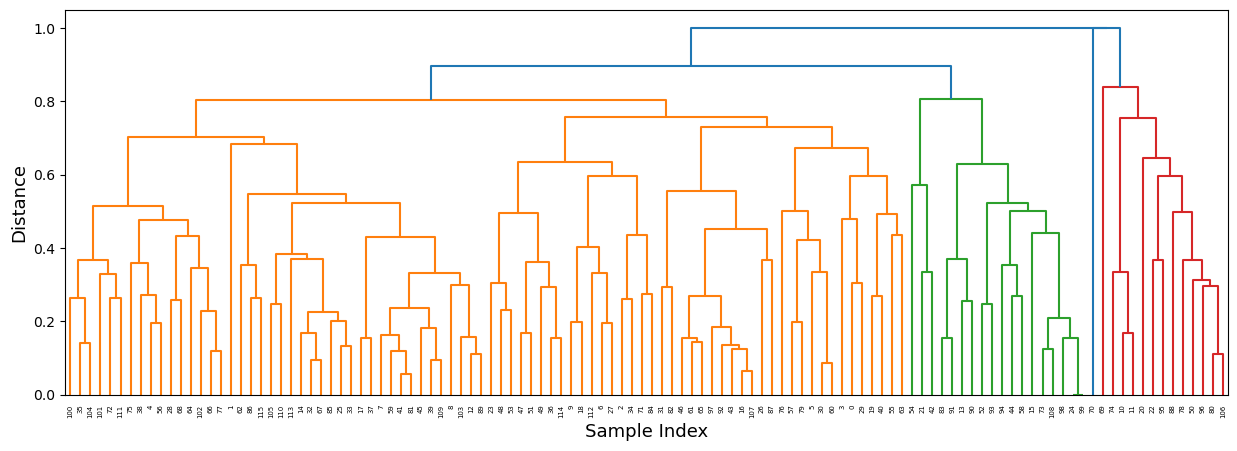

In [196]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram 

plt.figure(figsize=(15, 5))
dendrogram(Z, color_threshold=0.85) # you can change this value to change the number of clusters you get
plt.xlabel("Sample Index", fontsize=13)
plt.ylabel("Distance", fontsize=13)
plt.show()

The above dendrogram produces three clusters (although this is something you can change to be more/less clusters). Now I will assign cluster labels and look how the assemblage data and hydrological data is different between those clusters

In [197]:
from scipy.cluster.hierarchy import fcluster

df['cluster'] = fcluster(Z, t=0.85, criterion='distance')
df_std['cluster'] = fcluster(Z, t=0.85, criterion='distance')

df

,temp,depth,current,do,year,loc_id,BHMW,BKBH,BKCP,BKSS,...,U-CT,U-CY,WDSN,WLYE,WTBS,WTCP,WTSK,YLBH,YWPH,cluster
0,10.7,0.86,0.00,10.2,2006,0,0,0,1,0,...,1,0,0,0,0,0,1,0,1,1
1,10.5,2.80,0.01,10.1,2006,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,11.7,2.00,0.02,8.3,2006,2,0,0,0,0,...,0,0,0,1,0,0,0,1,1,1
3,12.5,0.61,0.16,8.2,2007,3,1,0,0,1,...,0,0,0,0,0,0,1,0,1,1
4,14.3,1.00,0.06,6.4,2007,4,0,0,1,1,...,0,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,15.4,1.20,0.00,6.5,2005,109,1,0,0,1,...,0,0,0,0,0,0,0,0,1,1
112,15.7,1.40,0.02,6.7,2005,110,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
113,8.5,0.66,0.00,9.2,2006,111,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
114,7.9,0.50,0.01,10.7,2008,112,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1


In [198]:
df.groupby('cluster').size()

cluster
1    84
2    18
3    13
4     1
dtype: int64

Technically there is a fourth cluster, but it so different it only has one member. I'm going to discard it for now. 

In [199]:
df = df[df['cluster'] <= 3]
df.reset_index(drop=True, inplace=True)

df_std = df_std[df_std['cluster'] <= 3]
df_std.reset_index(drop=True, inplace=True)

### Assemblage EDA
***

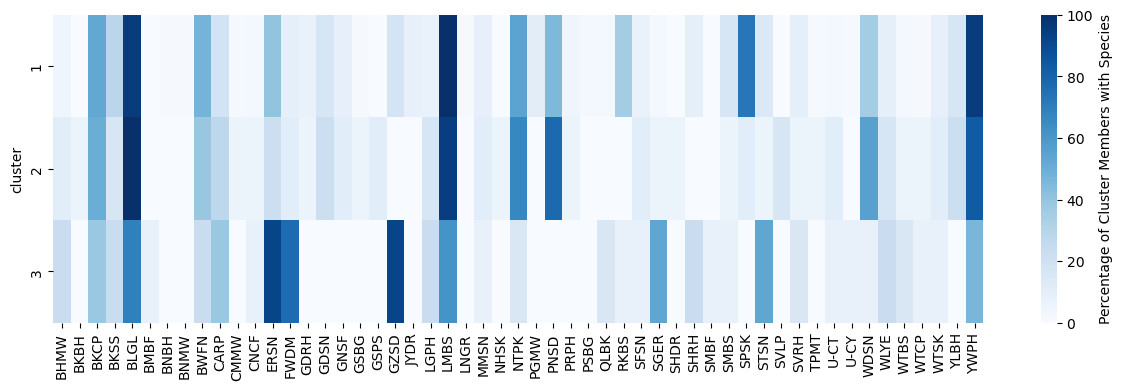

In [200]:
import seaborn as sns

cluster_grouped  = df.groupby('cluster')[fish_cols].mean() * 100
plt.figure(figsize=(15, 4))
sns.heatmap(cluster_grouped, cmap='Blues', annot=False, fmt=".1f", cbar_kws={'label': 'Percentage of Cluster Members with Species'});

Cluster 1 and 2 are fairly similar. Cluster 1 has a lot more of SPSK, LMBS, and YWPH. Cluster 2 has more BLGL, NTPK, PNSD, WDSN. Cluster 3 is different, it has ERSN, FWDM, GZSD, STSN. 

### Hydrological EDA
***

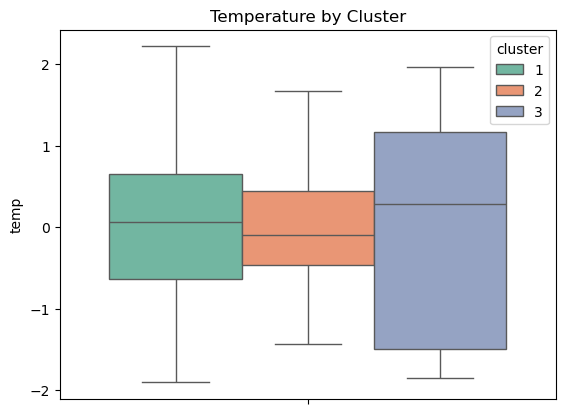

In [201]:
fig, ax = plt.subplots(1, 1)
sns.boxplot(df_std, hue = 'cluster', y = 'temp', palette = "Set2", ax  = ax);
ax.set_title("Temperature by Cluster");

Cluster 3 is a little warmer and has more variation.

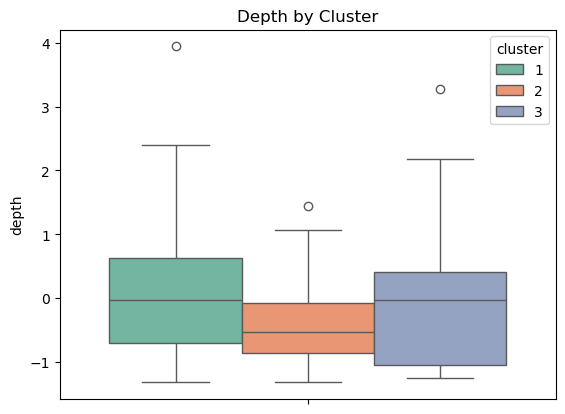

In [202]:
fig, ax = plt.subplots(1, 1)
sns.boxplot(df_std, hue = 'cluster', y = 'depth', palette = "Set2", ax  = ax);
ax.set_title("Depth by Cluster");

Cluster 2 is a little more shallow

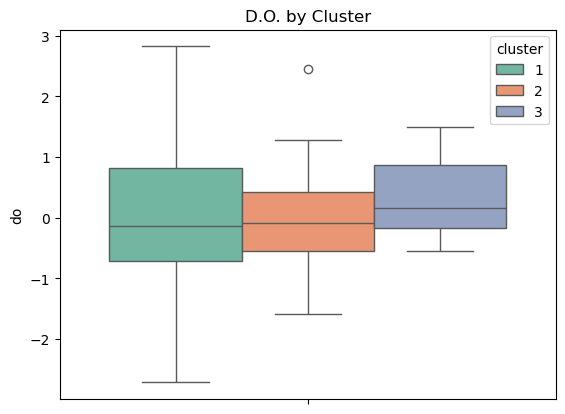

In [203]:
fig, ax = plt.subplots(1, 1)
sns.boxplot(df_std, hue = 'cluster', y = 'do', palette = "Set2", ax  = ax);
ax.set_title("D.O. by Cluster");

Cluster 3 has more dissolved oxygen

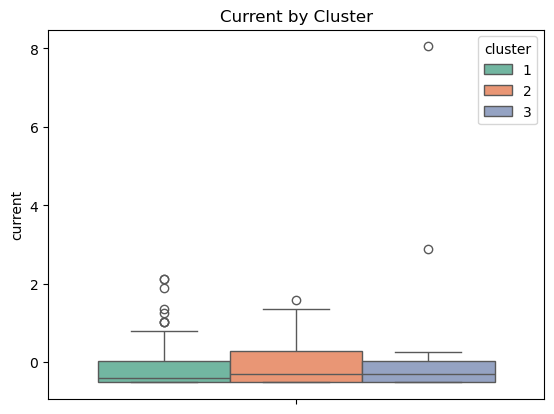

In [204]:
fig, ax = plt.subplots(1, 1)
sns.boxplot(df_std, hue = 'cluster', y = 'current', palette = "Set2", ax  = ax);
ax.set_title("Current by Cluster");

Cluster 2 has a faster current

### Decision Tree
***

In [205]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df_std[['temp', 'depth', 'current', 'do']], df_std['cluster'], test_size=0.2, random_state=42, shuffle=True)

clf = DecisionTreeClassifier(max_depth = 3, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

A super simple decision tree can guess which cluster (of the three) a set of hydrological features belongs to with > 50% accuracy (again, this probably can get better, but that's just an initial look). 

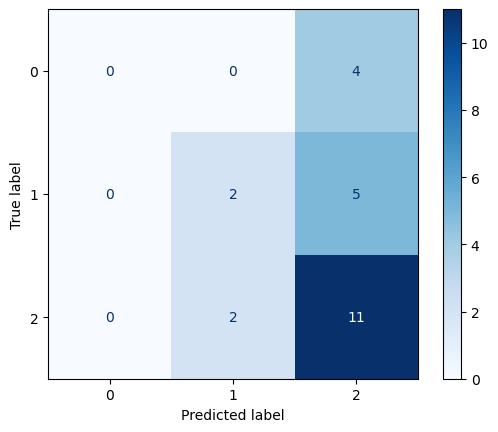

In [190]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # You can customize the colormap

plt.show()

The model does a fairly good job of finding cluster 2 when it's in fact cluster 2, but has a harder time with the other clusters (to be fair, the first cluster is pretty rare to begin with) 

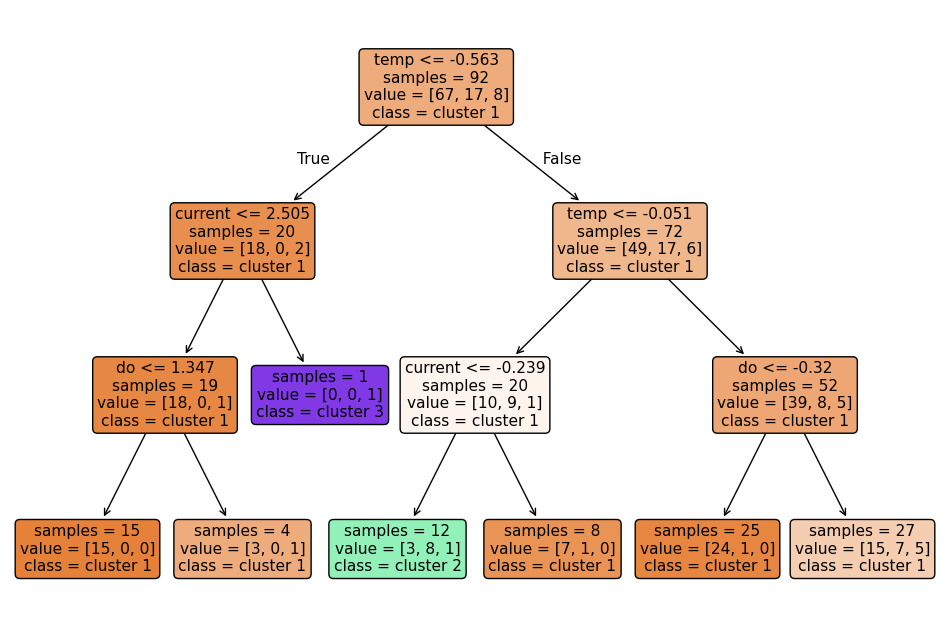

In [209]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming `clf` is your trained DecisionTreeClassifier model
plt.figure(figsize=(12,8))  # Adjust the size to fit your tree
plot_tree(clf, filled=True, feature_names=['temp', 'depth', 'current', 'do'], class_names=['cluster 1', 'cluster 2', 'cluster 3', 'cluster 4'], rounded=True, impurity=False)
plt.show()

This is the end-product I'd like to generate, where you can see how each split (based on hydrological features) leads to different clusters (types of assemblages). 